# Data Preparation CA 1 - Eduardo Cohen - Scania Trucks Components Report

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aps_failure_df = pd.read_csv("aps_failure_set.csv")

In [3]:
aps_failure_df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [4]:
aps_failure_df.tail(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,neg,32,0,0,na,0,0,0,0,0,...,258,98,224,166,36,486,0,0,0,0
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


Reading the first 10 rows of the dataset to understand what information we have. As we already know the information is related to failures of the components. This is divided into positive classes for the component failures related to the Air Pressure system (APS) and the negative class for the component failures not related to APS. Except for the column class, most of the information seems to be numerical. Also, there is some information with the value "na" (Not Applicable), meaning there is information there that could not be interpreted or is not available. We should turn it into numbers too for our future analysis.

In [5]:
aps_failure_df.shape

(60000, 171)

In [6]:
aps_failure_df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

Gathering more information about the size of our dataset we can understand we have 60000 rows and 171 columns. By the number of columns (features), we will need to reduce this amount of data so we can filter the information that is most relevant and start to make a better analysis.

In [7]:
aps_failure_df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

We can see we have an object as the type of information (string) meaning most of the numbers are actually text (except for the column aa_000) so this should be converted to number type (integer) so we are able to continue our analysis further.

In [8]:
aps_failure_df['ab_000'].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

In [9]:
aps_failure_df['ad_000'].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

First, we will deal with the not available information. We identify there are unique values for the not available information ("na"). 

In [10]:
duplicate_rows_df = aps_failure_df[aps_failure_df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 171)


Verifying there are not any duplicate values in our dataset, in case we need to delete them to avoid leading to any confusion. The number 0 shows that in all of the rows there are no repeated values.

In [11]:
print(aps_failure_df.isnull().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


Verifying there are not any empty values in our dataset. The number 0 shows in all of the rows there are no empty values.

In [12]:
missing_values = ['na']
aps_failure_df = pd.read_csv('aps_failure_set.csv',na_values=missing_values)

By replacing the "na" (Not available) values to "Nan" (Not As numbers) values or, in this case, defining the missing values, we are able to work with them in the code further (Note: the database does not recognize "na" values).

In [13]:
aps_failure_df['ab_000'].unique()

array([ nan,   0.,   2.,   4.,   6.,   8.,  18.,  10.,  12.,  16., 204.,
        24., 134.,  90.,  26.,  14.,  34.,  52.,  20.,  22.,  30.,  36.,
       100.,  48.,  58.,  32.,  28.,  44.,  46.,  68.])

Confirming the change of the values was correctly made. Now we can see the values as "Nan".

In [14]:
aps_failure_df = aps_failure_df.fillna(aps_failure_df.median())
aps_failure_df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,0.0,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,0.0,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,126.0,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [15]:
aps_failure_df['ab_000'].unique()

array([  0.,   2.,   4.,   6.,   8.,  18.,  10.,  12.,  16., 204.,  24.,
       134.,  90.,  26.,  14.,  34.,  52.,  20.,  22.,  30.,  36., 100.,
        48.,  58.,  32.,  28.,  44.,  46.,  68.])

We have replaced the "Nan" values with the median value of the database, meaning we are using a value that is the intermediate of two values the numbers of the dataset to fill out the missing values. We can work with them as a numerical variable and we have defined the missing values to a number that we can use in our analysis. Rowntre (1981, p.44) states that "the median is quoted as the valuehalf-way between the two middle values.".

In [16]:
aps_failure_df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [17]:
aps_failure_df.shape

(60000, 171)

We can check we do not have any data lost after we made the replacement (60000 rows).

In [18]:
aps_failure_df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

As we mentioned before we will need to change the format of the numbers that are actually text.

In [19]:
aps_failure_numbers_df = aps_failure_df.iloc[:,1:-1]
aps_failure_text_df = aps_failure_df.iloc[:,0]

In [20]:
aps_failure_numbers_df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0


In [21]:
aps_failure_text_df.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

Diving the dataset in two, one for all the numerical information (aps_failure_numbers_df) from the second column (after the class column) to the last column, and the other part is for the text information (the class as the first column that we called as "aps_failure_text_df"). To manipulate the dataset better and convert the numbers from text to numerical information.

In [22]:
aps_failure_numbers_df = aps_failure_numbers_df.astype(int)

In [23]:
aps_failure_numbers_df.dtypes

aa_000    int32
ab_000    int32
ac_000    int32
ad_000    int32
ae_000    int32
          ...  
ee_006    int32
ee_007    int32
ee_008    int32
ee_009    int32
ef_000    int32
Length: 169, dtype: object

Converting the numbers from text to numbers (integer).

In [180]:
new_aps_failure_df = pd.concat([aps_failure_numbers_df,aps_failure_text_df],axis=1, join="inner")

In [181]:
new_aps_failure_df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,class
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,neg
1,33058,0,0,126,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,neg
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,neg
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,neg
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,neg


Now that we have successfully changed the format, we are joining the two dataset into one with the information more clean, to continue with the data analysis. We have moved the class column until the end so we can understand that this is the column affected (dependable variable) by the rest of the columns (independent variable) to define what type of class it is, "positive" or "negative" for each one of the components.

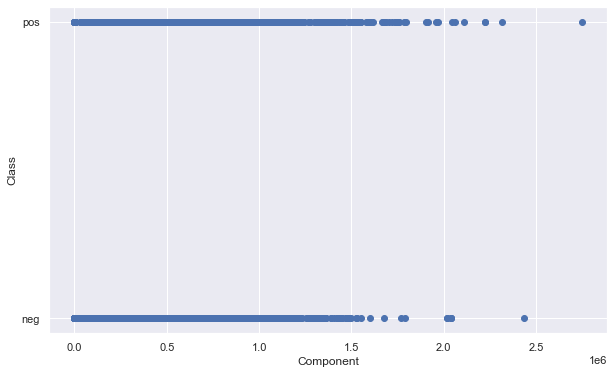

In [182]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(new_aps_failure_df['aa_000'], new_aps_failure_df['class']) 
ax.set_xlabel('Component') 
ax.set_ylabel('Class') 
plt.show() 

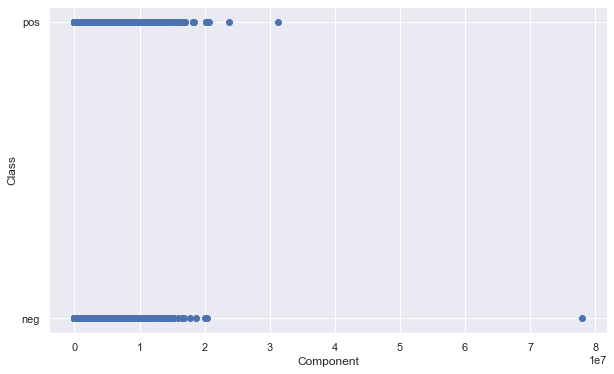

In [183]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(new_aps_failure_df['ee_002'], new_aps_failure_df['class']) 
ax.set_xlabel('Component') 
ax.set_ylabel('Class') 
plt.show() 

<AxesSubplot:xlabel='cc_000'>

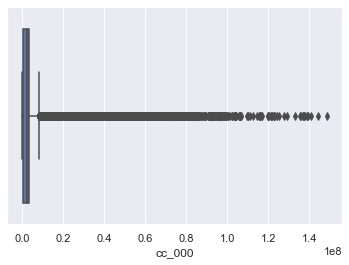

In [184]:
sns.boxplot(x=new_aps_failure_df['cc_000'])

<AxesSubplot:xlabel='aa_000'>

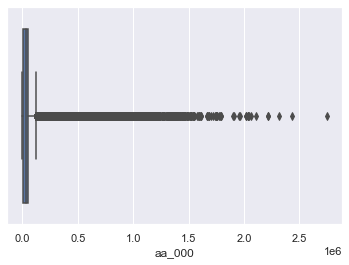

In [185]:
sns.boxplot(x=new_aps_failure_df['aa_000'])

We can see in these graphs that we have values that are either too high or too low (outliers). To make our analysis more accurate we should remove them, but first, we need to reduce the number of columns we have, 171 (features), to have better management of all of this data.

We are going to use PCA (Principal Component Analysis). This is essentially an algorithm to reduce the dimensionality or reduction of data. Francesco Palumbo et al (2008, p.356) adds as well "They use PCA as a technique for describing a dataset without imposing any assumption about distribution or without starting from an underlying statistical model" (Note: et al. means ‘and others’).

In [187]:
new_aps_failure_df2 = new_aps_failure_df[new_aps_failure_df['class'] == 'neg']
new_aps_failure_df2.shape

(59000, 170)

In [30]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 

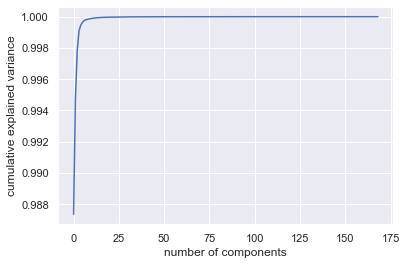

In [31]:
pca = PCA().fit(aps_failure_numbers_df) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

We are using the PCA algorithm to plot in a histogram only the numerical part of the dataset ("aps_failure_numbers_df") to understand the number of components (columns) we need to describe the variance (we have excluded the class columns for now as it is text information that the PCA can not process, we will add them after we finish reducing the components). In the graph, we can determine we will need around 3 to 10 components to describe at least 99.5% of the variance (cumulative explained variance). This number of components will be considered to reduce the amount of data we currently have.

In [50]:
pca = PCA(3)
projected = pca.fit_transform(aps_failure_numbers_df)

In [48]:
projected.shape

(60000, 3)

In [49]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98734852, 0.9946776 , 0.99782633])

After reducing the components to 3 and calculating the cumulative sum of the variance (np.cumsum) we can observe we have reached the desired variance of 99.7% so we can stop adding more features (columns) to the dataset.

In [96]:
aps_failure_pca = pd.DataFrame(projected, columns =['Component1', 'Component2', 'Component3'])

In [97]:
aps_failure_pca.head(10)

,Component1,Component2,Component3
0,1.794489e+09,1.046194e+06,3.518185e+06
1,-3.362023e+08,8.234378e+05,-7.090018e+06
2,-3.362019e+08,8.546046e+05,-1.059183e+07
3,-3.361789e+08,6.979197e+05,-1.529578e+07
4,-3.362548e+08,1.231332e+05,9.671098e+06
5,1.794513e+09,8.637247e+05,-4.562310e+06
6,-3.361789e+08,7.070339e+05,-1.521655e+07
7,1.794485e+09,1.027589e+06,4.526269e+06
8,-3.361995e+08,1.297753e+06,-3.203121e+06
9,-3.362306e+08,1.158894e+06,-6.780627e+06


In [55]:
print(aps_failure_pca.isnull().sum())

Component 1    0
Component 2    0
Component 3    0
dtype: int64


In [95]:
aps_failure_pca['Component1'].unique()

array([ 1.79448935e+09, -3.36202266e+08, -3.36201866e+08, ...,
        1.79450871e+09,  1.79444071e+09, -3.36285802e+08])

Showing the new dataset in a table with the 3 features we currently have to see how the observations look now and check there are no empty or incorrect values on it.

In [135]:
aps_failure_pca['class'] = new_aps_failure_df['class']

In [130]:
aps_failure_pca.head()

,Component1,Component2,Component3,class
1,-3.362023e+08,8.234378e+05,-7.090018e+06,neg
2,-3.362019e+08,8.546046e+05,-1.059183e+07,neg
3,-3.361789e+08,6.979197e+05,-1.529578e+07,neg
6,-3.361789e+08,7.070339e+05,-1.521655e+07,neg
9,-3.362306e+08,1.158894e+06,-6.780627e+06,pos


We have rejoined our new dataset after the data reduction with the class column.

<AxesSubplot:xlabel='Component3'>

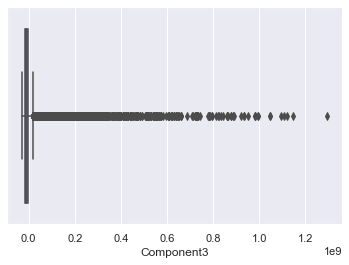

In [102]:
sns.boxplot(x=aps_failure_pca['Component3'])

Back to the outliers that we mentioned before as we can see in the graphs, some values are really high or really low and out of the box that we should remove to make our database more accurate. As Antony Unwinet et al (2008, p.839)  affirms "A transformation might help (but it is not always appropriate...). The outliers could be trimmed or discarded (depending on what kinds of outliers they are)" (Note: et al. means ‘and others’)

In [136]:
Q1 = aps_failure_pca.quantile(0.25) 
Q3 = aps_failure_pca.quantile(0.75) 
IQR = Q3 - Q1 
print(IQR)

Component1    2.189483e+04
Component2    1.560500e+05
Component3    5.555930e+06
dtype: float64


We are defining our minimum and maximum quantile values (maximum and minimum values) to be removed.

In [137]:
aps_failure_pca = aps_failure_pca[~((aps_failure_pca < (Q1-1.5 * IQR)) |(aps_failure_pca > (Q3 + 1.5 * IQR))).any(axis=1)] 
aps_failure_pca.shape

<ipython-input-137-ceb795a3b9e9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  aps_failure_pca = aps_failure_pca[~((aps_failure_pca < (Q1-1.5 * IQR)) |(aps_failure_pca > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-137-ceb795a3b9e9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  aps_failure_pca = aps_failure_pca[~((aps_failure_pca < (Q1-1.5 * IQR)) |(aps_failure_pca > (Q3 + 1.5 * IQR))).any(axis=1)]


(35937, 4)

In [138]:
aps_failure_pca.head()

,Component1,Component2,Component3,class
1,-3.362023e+08,823437.761836,-7.090018e+06,neg
2,-3.362019e+08,854604.565149,-1.059183e+07,neg
3,-3.361789e+08,697919.696844,-1.529578e+07,neg
6,-3.361789e+08,707033.883744,-1.521655e+07,neg
10,-3.362172e+08,495385.819750,-3.573562e+06,neg


After we reduced the number of variables (observations) the number decreased to 35937 by removing the outliers.

<AxesSubplot:xlabel='Component1'>

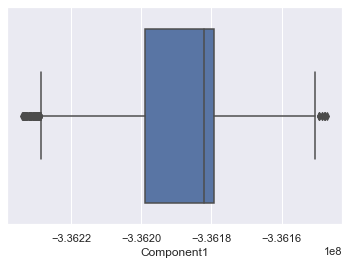

In [139]:
sns.boxplot(x=aps_failure_pca['Component1'])

Also, we can check on the graph (box plot) we have the higher and lower values normalized that will result, as previously mentioned, in a more accurate dataset.

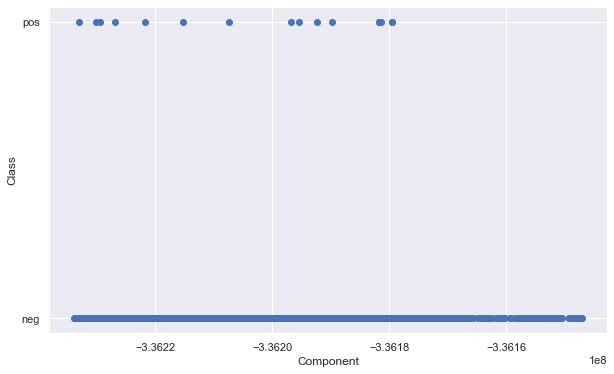

In [140]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(aps_failure_pca['Component1'], aps_failure_pca['class']) 
ax.set_xlabel('Component') 
ax.set_ylabel('Class') 
plt.show()

Analyzing more about the values in the graph we can see there are more values in the "negative" class rather than the "positive" class. We are going to divide these two classes to get more information about them and try to get some insights.

In [166]:
aps_failure_pca_pos = aps_failure_pca[aps_failure_pca['class'] == 'pos']
aps_failure_pca_pos.head(10)

,Component1,Component2,Component3,class
3734,-3.362075e+08,9.403574e+05,-9.892316e+06,pos
7181,-3.362270e+08,1.054364e+06,-7.313612e+06,pos
10124,-3.361796e+08,7.055185e+05,-1.520176e+07,pos
10186,-3.361815e+08,7.210641e+05,-1.478633e+07,pos
10963,-3.361818e+08,6.818137e+05,-1.467569e+07,pos
24043,-3.361818e+08,7.394112e+05,-1.385151e+07,pos
28279,-3.361898e+08,8.028091e+05,-1.340642e+07,pos
29405,-3.362331e+08,6.842562e+05,-1.364671e+06,pos
33773,-3.362218e+08,1.062900e+06,-7.252234e+06,pos
35543,-3.361796e+08,6.870679e+05,-1.523574e+07,pos


In [162]:
aps_failure_pca_pos.shape

(16, 4)

We have divided the dataset for the positive class first and we can see there are 16 rows (observations) from the whole dataset dedicated to this class.

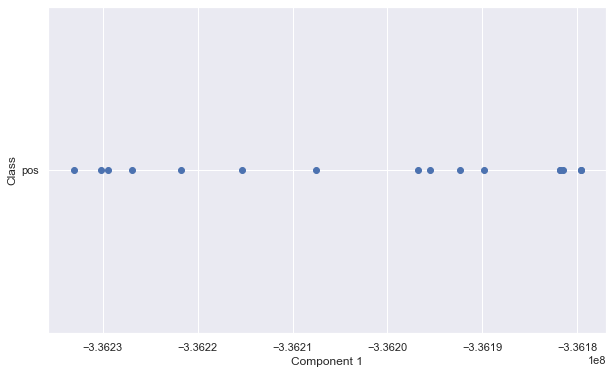

In [175]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(aps_failure_pca_pos['Component1'], aps_failure_pca_pos['class']) 
ax.set_xlabel('Component 1') 
ax.set_ylabel('Class') 
plt.show()

Comparing the values from "Component 1" on the positive class we can identify most of them are scattered (on our scatterplot graph above) but the values are not showing bigger differences among them. That means the values are not high or low and they nor represent much variance within them. As Antony Unwin et al (2008, p.847) mentions "The utilization of selection and linking for scatterplots can be highly effective, but it is dependent on the data distribution." and (2008, p.848) "...The success of a particular plot depends on there being clear-cut information to find." (Note: et al. means ‘and others’).

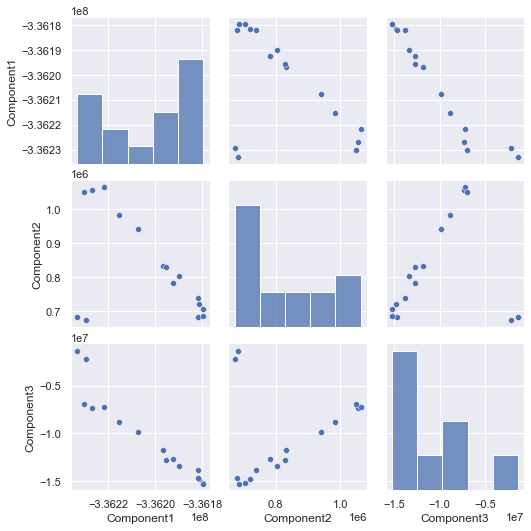

In [188]:
sns.pairplot(aps_failure_pca_pos)

When comparing all of the components of the positive class and trying to find a correlation, we can see the same, the values are scattered. We can say there is no consistency on the amount of failures of the components in this class.

In [165]:
aps_failure_pca_neg = aps_failure_pca[aps_failure_pca['class'] == 'neg']
aps_failure_pca_neg.head(10)

,Component1,Component2,Component3,class
1,-3.362023e+08,823437.761836,-7.090018e+06,neg
2,-3.362019e+08,854604.565149,-1.059183e+07,neg
3,-3.361789e+08,697919.696844,-1.529578e+07,neg
6,-3.361789e+08,707033.883744,-1.521655e+07,neg
10,-3.362172e+08,495385.819750,-3.573562e+06,neg
11,-3.362092e+08,969957.135415,-1.021140e+07,neg
12,-3.361824e+08,663533.706770,-1.411569e+07,neg
14,-3.361884e+08,781643.226757,-1.192297e+07,neg
15,-3.361791e+08,699300.302729,-1.526863e+07,neg
17,-3.361792e+08,687423.843255,-1.521413e+07,neg


In [164]:
aps_failure_pca_neg.shape

(35921, 4)

For the negative class, we can observe there are 35921 rows (observations) from the whole dataset classified to this class. Almost the majority of the dataset is defined as negative.

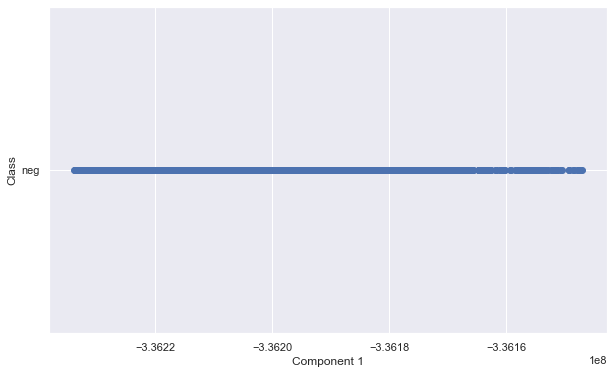

In [176]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(aps_failure_pca_neg['Component1'], aps_failure_pca_neg['class']) 
ax.set_xlabel('Component 1') 
ax.set_ylabel('Class') 
plt.show()

Comparing the values from "Component 1" on the negative class we can notice most of them are similar values. Seems the values are grouped in the same numbers between -3.3622 and -3.3616.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(aps_failure_pca['Component1'], aps_failure_pca['class']) 
ax.set_xlabel('Component') 
ax.set_ylabel('Class') 
plt.show()

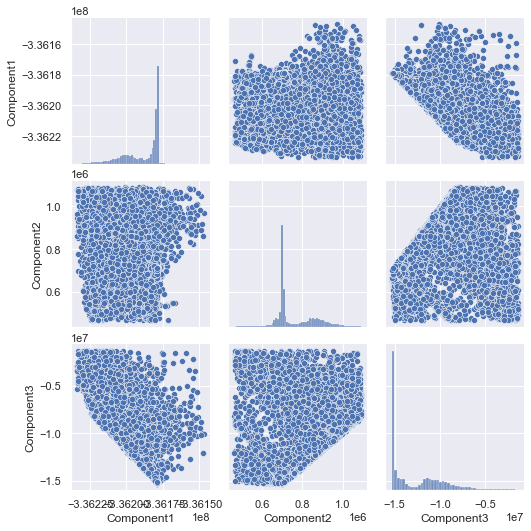

In [189]:
sns.pairplot(aps_failure_pca_neg)

When we apply the comparison to all of the components of the negative class and try to find a correlation we can see the same, the values are very close and similar. We can state there is consistency in the number of failures on the components of this class.

# Curse of Dimensionality

Regarding the Curse of Dimensionality, we need to take two important facts into our analysis. Machine Learning models are much better at making data analysis when we are facing big amounts of dimensions than humans that are not prepared to find a method or system when there are large portions of the dimensions extended in the dataset and correlated with each other. The other fact is when we add more dimensions we will need more processing from our machine to make the analysis as well as we will require more training data to attain more significant machine learning models.

We have to consider as the number of features (columns) grows the model performance decreases. The same happens with the distance between different points in the data, when the features increase, the distances increase equally.

Considering these distances on information incrementing, supervised machine learning tends to have more processing power as the testing sets are less expected to be defined on their model learning from the same training features. If we have more information we are increasing the possibility of more of this data not being relevant for the analysis which could lead to an unsatisfactory efficiency.

We need to take care with overfitting and underfitting our machine learning models. 

Overfitting means our model is optimal to predict the information based on the training dataset but is unsuccessful when presented with new data. This denotes the model not having the generalization capacity.

On the other hand, underfitting means our models have little representation capability. In other words, the machine learning model is not able to model the data even when we have all the training datasets we require. This would lead to an unsatisfactory performance from our model as well.

# Conclusions

Considering we were working with a large database with several rows and columns we were able to make successfully cleaning of it by replacing the missing values with numerical ones, fixing the problems with the format, removing the outliers that were making the database inaccurate, reducing the number of features to a number that could help to have better management of the data (PCA - Principal Component Analysis) and splitting the database between the positive and negative classes for a better understanding of the information and analysis. 

As the Curse of Dimensionality suggested, reducing the number of features on the dataset can help to decrease the processing power as well as to have a machine learning model that is not overfitting or underfitting. Also growing our chances leads to much better performance and model generalization capacity that should be considered for future model analysis.

We can recognize that these are the main factors for a successful machine learning model prediction the way we plan based on our test and training dataset and achieve the results we want.

Regarding the analysis based on the information we could gather after our data cleaning and plotting the graphs to find some correlations between the features and the classes:

As per the positive and negative class results, we can say there are more failures in the negative class. The failures on the three components we gathered after the feature reduction were more consistent in numbers, similar to each other and the amount was very large compared to the positive class (35921 over a total of 35937 values).

Regarding the positive class, the failures were much lower (16 over the total database, after the feature reduction) and the values were scattered over the graph meaning there were no consistent failures over the three components analyzed for this class.

After considering this analysis and comparison among the classes we can take only as a preliminary result that the negative class is more highlighted in our results and most of the failures are from components not related to the APS. So the APS system is not the main factor for the failure of the trucks. For a further detailed and more accurate analysis, we should apply a machine learning model with a training and test dataset to get new insights, better data comparison between the classes, and more useful predictions from the model.

# References

. Rowntre, Derek. (1981) Statistics Without Tears - A Primer For Non Mathematicians, Needham Heights, Massachusetts, USA: Allyn and Bacon,A Simon & Schuster Company.

. Francesco Palumbo et al., Antony Unwinet et al. (2008) Handbook of Data Visualization, Leipzig, Germany: Springer-Verlag Berlin Heidelberg.